In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from scipy.optimize import root,ridder
from scipy.special import erf
from tqdm import tqdm_notebook as tqdm

In [3]:
def MSD_for_limited_steps(sigma, L):
    #defined in my notes
    #return -(np.sqrt(2/np.pi))*np.exp(-L**2/(2*sigma**2))/(erf(L/(np.sqrt(2)*sigma))) *L*sigma + sigma**2
    z = L**2/(2*sigma**2)
    return -(L)**2/2*(np.exp(-z))/(1-np.exp(-z)) + sigma**2



def sigma_for_MSD(MSD, L):
    return root(lambda s:MSD_for_limited_steps(s, L) - MSD, 1e-2)

In [4]:
msd_based = []
approximation = []
sigma = 1
N = 450
number_of_iterations = 1000
    
Ls =np.linspace(.71*sigma, 5*sigma)
msd_based_mean = []
msd_based_std = []
mean = []
std = []

for L in tqdm(Ls):
    msd_based = []
    sigmas= []
    for _ in range(number_of_iterations):
        xs = np.random.normal(0, sigma, N )
        ys = np.random.normal(0, sigma, N )
        filtered_steps = np.concatenate([ys[xs**2 + ys**2 < L**2],xs[xs**2 + ys**2 < L**2]])
        MSD = np.sum(filtered_steps**2 / len(filtered_steps))
        # MSD = steps**2/len(filwsteps)
        msd_based.append(np.sqrt(MSD))
        res = sigma_for_MSD(MSD, L).x[0]
        if res < 5:
            sigmas.append(res)
    msd_based_mean.append(np.mean(msd_based))
    msd_based_std.append(np.std(msd_based) )
    mean.append(np.mean(sigmas) )
    std.append(np.std(sigmas) )

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

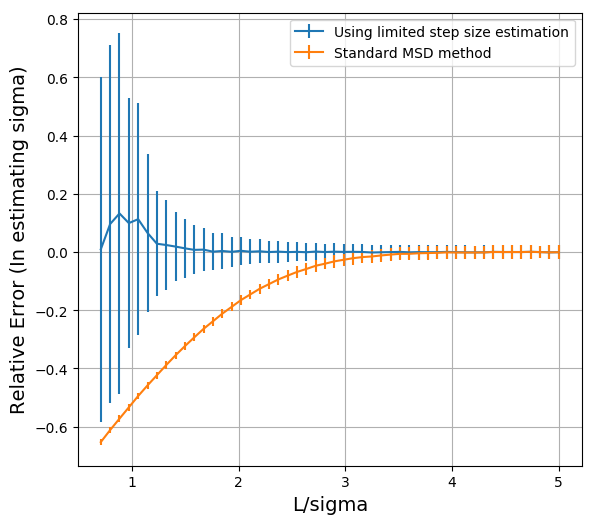

In [5]:
# plt.plot(Ls, mean)
plt.errorbar(Ls, np.array(mean)-1, std)
plt.errorbar(Ls,np.array(msd_based_mean)-1, msd_based_std)
plt.xlabel("L/sigma", fontsize = 14)
plt.ylabel("Relative Error (In estimating sigma)", fontsize = 14)
plt.legend(["Using limited step size estimation","Standard MSD method"])
plt.grid()
# plt.plot(Ls,msd_based_mean)

In [389]:
print(np.mean(approximation[approximation < 5]), 
      np.std(approximation[approximation < 5]))

1.0619966936044998 0.2839558777844385


In [386]:
print(np.sqrt(np.mean(msd_based)), np.std(msd_based))

0.6919820913404162 0.007534896386670248
